In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.style.use("cyberpunk")

In [97]:
df = pd.read_csv("data/IMDb movies.csv")

In [98]:
df.shape

(85855, 22)

In [99]:
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [100]:
df.year = df.year.map(str)
df = df.set_index('year')
year_counts = df.index.value_counts()
# One entry has 'TV Movie 2019' so it is dropped and 1 is added to the 2019 count
year_counts = year_counts.drop('TV Movie 2019')
year_counts[year_counts.index=='2019'] += 1
# Drop 2020 since the data is not complete for the year
year_counts = year_counts.drop('2020')
year_counts.index = pd.to_datetime(year_counts.index)
year_counts = year_counts.sort_index()

In [103]:
year_counts.shape

(111,)

In [152]:
year_counts

1894-01-01       1
1906-01-01       1
1911-01-01       5
1912-01-01       5
1913-01-01      13
              ... 
2015-01-01    2977
2016-01-01    3138
2017-01-01    3329
2018-01-01    3257
2019-01-01    2842
Name: year, Length: 111, dtype: int64

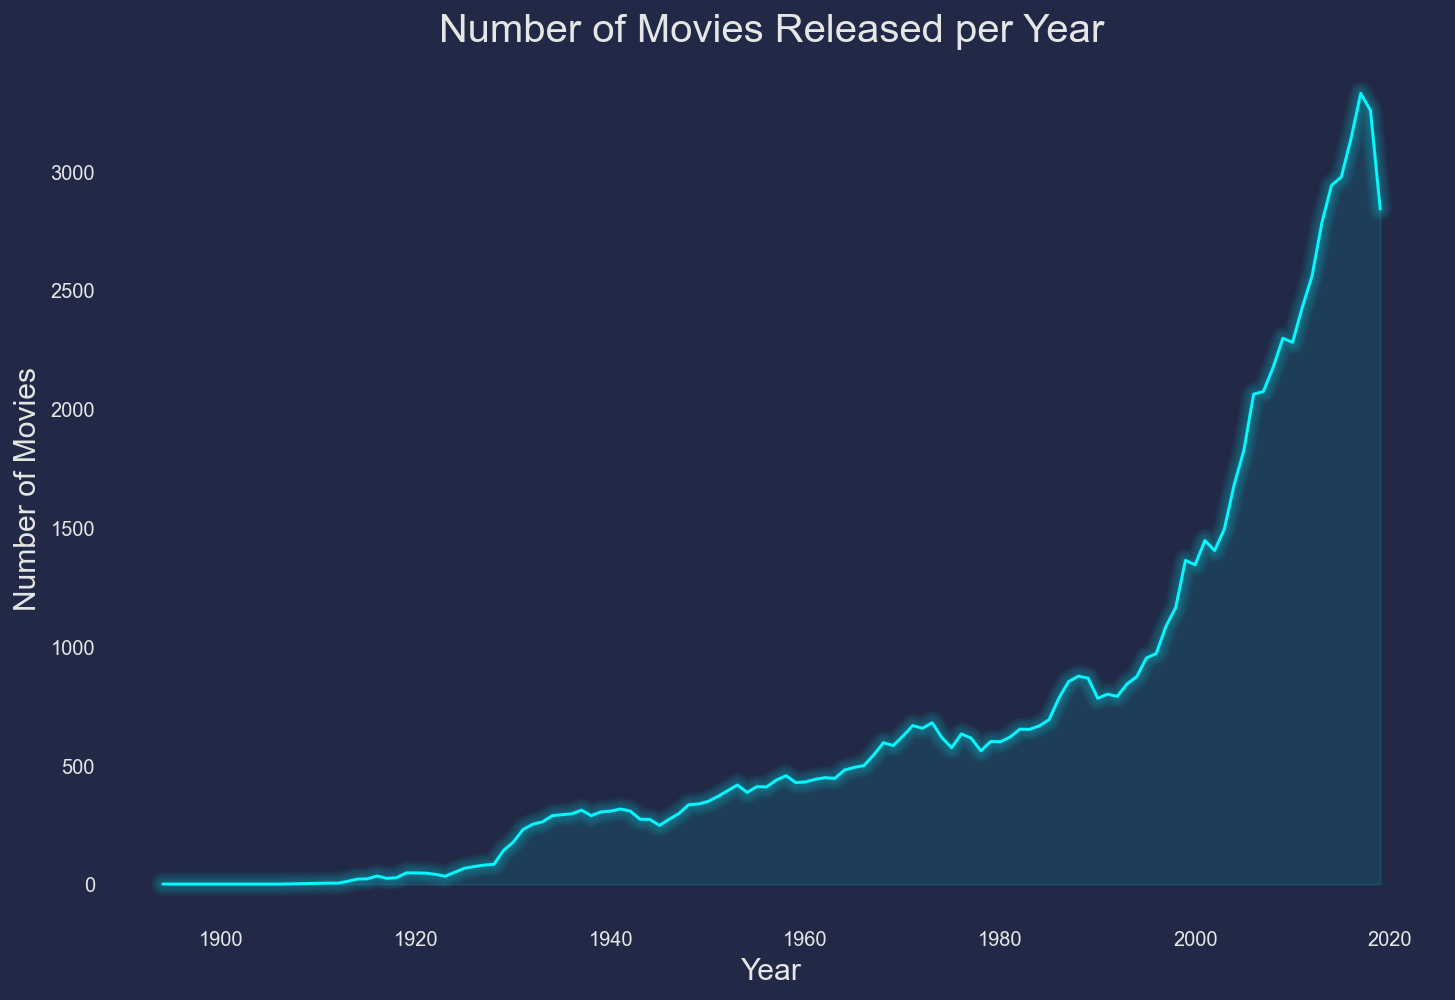

In [111]:
fig, ax = plt.subplots(figsize=(12,8))
years = year_counts.index
counts = year_counts.values
ax.plot(years, counts)
ax.set_title('Number of Movies Released per Year', fontsize=20)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Number of Movies', fontsize=15)
ax.grid(False)
mplcyberpunk.add_glow_effects()
plt.savefig('images/movie_counts_year.png', bbox_inches='tight')
plt.show()

In [112]:
df.columns

Index(['imdb_title_id', 'title', 'original_title', 'date_published', 'genre',
       'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [126]:
duration_counts = df.duration.value_counts()

In [148]:
np.arange(10,500,30)

array([ 10,  40,  70, 100, 130, 160, 190, 220, 250, 280, 310, 340, 370,
       400, 430, 460, 490])

In [153]:
bins = np.arange(10,500,15)
df.duration.value_counts(bins=bins)

(85.0, 100.0]     36415
(100.0, 115.0]    18038
(70.0, 85.0]      13417
(115.0, 130.0]     7401
(130.0, 145.0]     3563
(55.0, 70.0]       2836
(145.0, 160.0]     2113
(160.0, 175.0]      925
(40.0, 55.0]        472
(175.0, 190.0]      347
(190.0, 205.0]      110
(205.0, 220.0]       66
(220.0, 235.0]       33
(250.0, 265.0]       26
(235.0, 250.0]       26
(295.0, 310.0]       14
(265.0, 280.0]        9
(280.0, 295.0]        9
(310.0, 325.0]        7
(325.0, 340.0]        5
(355.0, 370.0]        5
(415.0, 430.0]        3
(340.0, 355.0]        2
(430.0, 445.0]        2
(475.0, 490.0]        1
(385.0, 400.0]        1
(400.0, 415.0]        1
(445.0, 460.0]        1
(460.0, 475.0]        0
(370.0, 385.0]        0
(25.0, 40.0]          0
(9.999, 25.0]         0
Name: duration, dtype: int64

In [133]:
def filtered_s(s, n):
    """filter a series, cutting off value counts less than or equal to n"""
    return s[s.values>n]

In [151]:
# filtered_s(df.duration.value_counts(bins=bins), 10).hist(bins=20)

# NLP

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

In [10]:
import nltk
from nltk.corpus import stopwords

In [1]:
!python --version

Python 3.7.7


In [2]:
import tensorflow as tf

tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
df = pd.read_csv("data/IMDb movies.csv")

In [7]:
desc_df = df.loc[df['description'].notnull()]

In [11]:
cv = CountVectorizer()
cv_fit = cv.fit_transform(desc_df['description'])

In [12]:
vocab_cv = cv.get_feature_names()

In [13]:
vocab_count = cv_fit.toarray().sum(axis=0)

MemoryError: Unable to allocate 43.3 GiB for an array with shape (83740, 69438) and data type int64

In [14]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(desc_df['description'])
vocab = np.array(sorted(tfidf.vocabulary_))
V = tfidf_matrix

In [15]:
cluster = KMeans(n_clusters=6)
cluster.fit(tfidf_matrix)
centroids = cluster.cluster_centers_

In [19]:
for idx, topic in enumerate(centroids):
    print(vocab[np.argsort(-topic)[:15]])

['life' 'man' 'story' 'new' 'world' 'group' 'friends' 'wife' 'war' 'town'
 'film' 'school' 'time' 'lives' 'small']
['old' 'year' 'years' 'boy' 'mother' 'life' 'girl' 'man' 'new' 'school'
 'friend' 'friends' 'lives' 'son' 'house']
['family' 'life' 'man' 'home' 'young' 'son' 'story' 'new' 'house'
 'daughter' 'years' 'lives' 'mother' 'girl' 'friends']
['young' 'woman' 'man' 'life' 'girl' 'husband' 'finds' 'new' 'story'
 'couple' 'boy' 'mother' 'beautiful' 'men' 'meets']
['father' 'son' 'young' 'mother' 'family' 'man' 'death' 'daughter' 'boy'
 'girl' 'life' 'home' 'woman' 'years' 'finds']
['love' 'falls' 'fall' 'story' 'young' 'life' 'girl' 'man' 'woman' 'meets'
 'true' 'beautiful' 'daughter' 'new' 'married']


In [17]:
nmf = NMF(n_components=6)
nmf.fit(V)
W = nmf.transform(V)
H = nmf.components_

In [18]:
for idx, topic in enumerate(H):
    print(vocab[np.argsort(-topic)[:15]])

['new' 'friends' 'town' 'group' 'school' 'world' 'small' 'war' 'high'
 'city' 'time' 'people' 'police' 'york' 'lives']
['young' 'man' 'woman' 'husband' 'finds' 'wife' 'married' 'tries' 'murder'
 'couple' 'beautiful' 'meets' 'relationship' 'mysterious' 'death']
['love' 'falls' 'girl' 'fall' 'beautiful' 'meets' 'married' 'triangle'
 'falling' 'stories' 'romantic' 'daughter' 'meet' 'affair' 'marry']
['old' 'family' 'year' 'father' 'mother' 'son' 'boy' 'daughter' 'years'
 'girl' 'home' 'death' 'house' 'returns' 'lives']
['life' 'changes' 'day' 'change' 'upside' 'real' 'living' 'new' 'live'
 'career' 'better' 'make' 'turned' 'film' 'meets']
['story' 'film' 'true' 'based' 'tells' 'set' 'movie' 'follows' 'world'
 'different' 'people' 'events' 'war' 'age' 'place']


In [ ]:
labels = np.array([''])